# Передаточна функція

In [172]:
from control.matlab import *
a = np.array([0,7,0,-3])
b = np.array([4,5,21,1])
w = tf(a ,b)
w


        7 s^2 - 3
------------------------
4 s^3 + 5 s^2 + 21 s + 1

# zpk-форма

In [173]:
from scipy import signal
import scipy
a = np.array([0,7,0,-3])
b = np.array([4,5,21,1])
a,b,k = scipy.signal.tf2zpk(a,b)
#система стійка

# Зробимо нестійку систему

In [197]:
a = np.array([0,7,0,-3])
b = np.array([4,5,21,1])

def function(a, b, k):
    return (k*a, b - k*a)

def function2(a, b, k):
    return (k*a, b + k*a)
    

In [202]:
a2, b2 = function2(a, b, 0.5)
tf2 = tf(a2, b2)
zpk1 = tf2zpk(a2, b2)
zpk1

(array([ 0.65465367, -0.65465367]),
 array([-1.07429097+2.03631202j, -1.07429097-2.03631202j,
         0.02358193+0.j        ]),
 0.875)

In [204]:
tf2


        3.5 s^2 - 1.5
----------------------------
4 s^3 + 8.5 s^2 + 21 s - 0.5

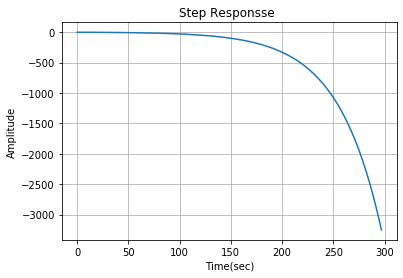

In [203]:
from control.matlab import *
import matplotlib.pyplot as plt

num = np.array([0,3.5,0,-1.5])
den = np.array([4,8.5,21,-0.5])
w= tf(num, den)
y,x=step(w)
plt.plot(x,y)
plt.title('Step Responsse ') 
plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')
plt.grid(True)
plt.show()


# ss-форма

In [174]:
from scipy.signal import tf2ss
num = np.array([0, 7,0,-3])
den = np.array([4,5,21,1])
A,B,C,D= tf2ss(num, den)

In [4]:
A,B,C,D

(array([[-1.25, -5.25, -0.25],
        [ 1.  ,  0.  ,  0.  ],
        [ 0.  ,  1.  ,  0.  ]]),
 array([[1.],
        [0.],
        [0.]]),
 array([[ 1.75,  0.  , -0.75]]),
 array([[0.]]))

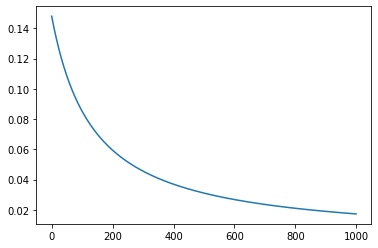

In [193]:
import numpy as np
def plot():
    s = np.linspace(10, 100, 1000)
    x = (7*s**2 - 3)/( 4*s**3 +5*s**2 + 21*s + 1)
    plt.plot(x)
plot()

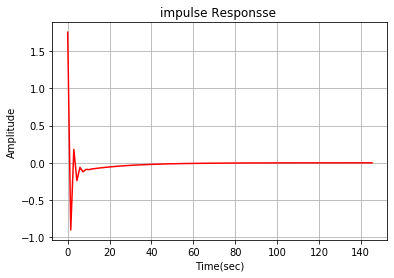

In [175]:
from control.matlab import *
import matplotlib.pyplot as plt

num = np.array([0,7,0,-3])
den = np.array([4,5,21,1])
w= tf(num, den)
y,x=impulse(w)
plt.plot(x,y,"r")
plt.title('impulse Responsse ') 
plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')
plt.grid(True)
plt.show()

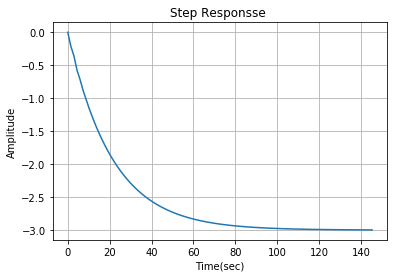

In [176]:
from control.matlab import *
import matplotlib.pyplot as plt

num = np.array([0,7,0,-3])
den = np.array([4,5,21,1])
w= tf(num, den)
y,x=step(w)
plt.plot(x,y)
plt.title('Step Responsse ') 
plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')
plt.grid(True)
plt.show()



# Канонічна форма керування


In [9]:
matrixА = [[0, 1, 0], 
    [0, 0, 1], 
    [-1/4, -21/4, -5/4]]
matrixА

[[0, 1, 0], [0, 0, 1], [-0.25, -5.25, -1.25]]

In [10]:
matrixB = [0,0,1]
matrixB

[0, 0, 1]

In [11]:
matrixC = [-3/4,0,7/4]
matrixC

[-0.75, 0, 1.75]

In [76]:
D = [0]
D

[0]

# Канонічна форма спостереження

In [22]:
matrixА1 = [[-5/4, 1, 0], 
    [-21/4, 0, 1], 
    [-1/4, 0, 0 ]]
matrixА1

[[-1.25, 1, 0], [-5.25, 0, 1], [-0.25, 0, 0]]

In [23]:
matrixB1 = [[7/4], [0],[-3/4]]
matrixB1

[[1.75], [0], [-0.75]]

In [179]:
matrixC1 = [[1,0,0]]
matrixC1


[[1, 0, 0]]

In [180]:
D1 = [0]
D1

[0]

# Перехід від ss-форми до tf форми 

In [181]:
a2,b2 = scipy.signal.ss2tf(matrixА1, matrixB1, matrixC1, D1)

In [182]:
num2 = a2[0]

In [183]:
from control.matlab import *
tf2 = tf(num2 ,b2)
tf2


1.75 s^2 + 3.553e-15 s - 0.75
------------------------------
s^3 + 1.25 s^2 + 5.25 s + 0.25

# Різниця реакції на імпульс

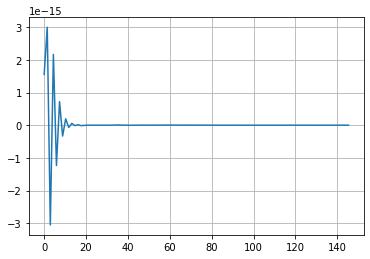

In [184]:
y,x=impulse(w)
y1,x = impulse(tf2)
plt.plot(x, y1-y)
plt.grid(True)

# Різниця реакції на сходинку

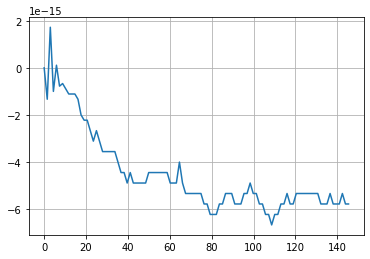

In [185]:
y,x= step(w)
y1,x = step(tf2)
plt.plot(x, y1-y)
plt.grid(True)